In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import xarray as xr
#import xbudget
#import regionate 
#import xwmt
#import xwmb
import matplotlib.pyplot as plt
from xgcm import Grid
import warnings
import cartopy.crs as ccrs
import cartopy.feature as cfeature
warnings.filterwarnings('ignore')
import os
import gc

In [3]:
from dask.distributed import Client
client = Client(n_workers=6,
                threads_per_worker=1,
                memory_limit='24GB')
client

<Client: 'tcp://127.0.0.1:43557' processes=6 threads=6, memory=134.11 GiB>

In [4]:
#PATH = "/gws/nopw/j04/co2clim/datasets/bSOSE/ITER156/"
#year='2024'
#os.listdir(PATH+year)

In [5]:
ds_TTEND_TOT = xr.open_dataset(PATH +f'{year}/TOTTTEND_bsoseI156_{year}_5day.nc')
ds_TTEND = ds_TTEND_TOT.isel(time=slice(1,2))
del(ds_TTEND_TOT)

ds_STEND_TOT = xr.open_dataset(PATH +f'{year}/TOTSTEND_bsoseI156_{year}_5day.nc')
ds_STEND = ds_STEND_TOT.isel(time=slice(1,2))
del(ds_STEND_TOT)

ds_ADV_TOT   = xr.open_mfdataset([PATH +f'{year}/ADVx_TH_bsoseI156_{year}_5day.nc',
                                  PATH +f'{year}/ADVy_TH_bsoseI156_{year}_5day.nc',
                                  PATH +f'{year}/ADVr_TH_bsoseI156_{year}_5day.nc',
                                  PATH +f'{year}/ADVx_SLT_bsoseI156_{year}_5day.nc',
                                  PATH +f'{year}/ADVy_SLT_bsoseI156_{year}_5day.nc',
                                  PATH +f'{year}/ADVr_SLT_bsoseI156_{year}_5day.nc'])
ds_ADV = ds_ADV_TOT.isel(time=slice(1,2))
del(ds_ADV_TOT)

ds_DIFF_TOT  = xr.open_mfdataset([PATH +f'{year}/DFxE_TH_bsoseI156_{year}_5day.nc',
                                  PATH +f'{year}/DFyE_TH_bsoseI156_{year}_5day.nc',
                                  PATH +f'{year}/DFrI_TH_bsoseI156_{year}_5day.nc',
                                  PATH +f'{year}/DFxE_SLT_bsoseI156_{year}_5day.nc',
                                  PATH +f'{year}/DFyE_SLT_bsoseI156_{year}_5day.nc',
                                  PATH +f'{year}/DFrI_SLT_bsoseI156_{year}_5day.nc'])
ds_DIFF = ds_DIFF_TOT.isel(time=slice(1,2))
del(ds_DIFF_TOT)

ds_FWFLUX_TOT = xr.open_dataset(PATH + f'{year}/oceFWflx_bsoseI156_{year}_5day.nc')
ds_FWFLUX = ds_FWFLUX_TOT.isel(time=slice(1,2))
del(ds_FWFLUX_TOT)

ds_TFLUX_TOT = xr.open_dataset(PATH + f'{year}/surfTflx_bsoseI156_{year}_5day.nc')
ds_TFLUX = ds_TFLUX_TOT.isel(time=slice(1,2))
del(ds_TFLUX_TOT)

ds_SW_TOT    = xr.open_dataset(PATH + f'{year}/oceQsw_bsoseI156_{year}_5day.nc')
ds_SW = ds_SW_TOT.isel(time=slice(1,2))
del(ds_SW_TOT)

ds_THETA_TOT = xr.open_dataset(PATH + f'{year}/Theta_bsoseI156_{year}_5day.nc')
ds_THETA = ds_THETA_TOT.isel(time=slice(1,2))
del(ds_THETA_TOT)

ds_SALT_TOT  = xr.open_dataset(PATH + f'{year}/Salt_bsoseI156_{year}_5day.nc')
ds_SALT = ds_SALT_TOT.isel(time=slice(1,2))
del(ds_SALT_TOT)

ds_SFLUX_TOT = xr.open_dataset(PATH + f'{year}/surfSflx_bsoseI156_{year}_5day.nc')
ds_SFLUX = ds_SFLUX_TOT.isel(time=slice(1,2))
del(ds_SFLUX_TOT)

ds_VEL_TOT   = xr.open_mfdataset(PATH +f'{year}/*velMass_bsoseI156_{year}_5day.nc')
ds_VEL = ds_VEL_TOT.isel(time=slice(1,2))
del(ds_VEL_TOT)

ds_SNAPS_TOT = xr.open_mfdataset([PATH + f'{year}/Theta_bsoseI156_{year}_5daySnaps.nc',
                                  PATH + f'{year}/Salt_bsoseI156_{year}_5daySnaps.nc'])
ds_SNAPS = ds_SNAPS_TOT.isel(time=slice(1,2))
del(ds_SNAPS_TOT)


In [47]:
ds_SSH_TOT    = xr.open_dataset(PATH + f'{year}/SSH_bsoseI156_{year}_5daySnaps.nc')
ds_SSH = ds_SSH_TOT.isel(time=1)

In [6]:
ds_SNAPS = ds_SNAPS.rename({"THETA":"THETA_SNAPS","SALT":"SALT_SNAPS"})

In [7]:
ds_tot=xr.merge([ds_TTEND,ds_STEND,ds_ADV,ds_DIFF,ds_TFLUX,ds_FWFLUX,ds_SFLUX,ds_SW,ds_THETA,ds_SALT,ds_VEL,ds_SNAPS])
ds_tot

<xarray.Dataset> Size: 7GB
Dimensions:      (time: 1, XC: 2160, YC: 588, Z: 52, XG: 2160, YG: 588, Zl: 52)
Coordinates: (12/33)
    iter         (time) int64 8B dask.array<chunksize=(1,), meta=np.ndarray>
  * time         (time) datetime64[ns] 8B 2024-01-08
  * XC           (XC) float32 9kB 0.08333 0.25 0.4167 ... 359.6 359.8 359.9
  * YC           (YC) float32 2kB -77.98 -77.95 -77.91 ... -30.02 -29.87 -29.72
  * Z            (Z) float32 208B -2.1 -6.7 -12.15 ... -5e+03 -5.4e+03 -5.8e+03
    rA           (YC, XC) float32 5MB dask.array<chunksize=(588, 2160), meta=np.ndarray>
    ...           ...
    hFacS        (Z, YG, XC) float32 264MB dask.array<chunksize=(52, 588, 2160), meta=np.ndarray>
    maskS        (Z, YG, XC) bool 66MB dask.array<chunksize=(52, 588, 2160), meta=np.ndarray>
    maskInS      (YG, XC) bool 1MB dask.array<chunksize=(588, 2160), meta=np.ndarray>
    rSurfS       (YG, XC) float32 5MB dask.array<chunksize=(588, 2160), meta=np.ndarray>
    rLowS        (YG, XC) float32 5MB dask.array<chunksize=(588, 2160), meta=np.ndarray>
  * Zl           (Zl) float32 208B 0.0 -4.2 -9.2 ... -4.8e+03 -5.2e+03 -5.6e+03
Data variables: (12/25)
    TOTTTEND     (time, Z, YC, XC) float32 264MB ...
    TOTSTEND     (time, Z, YC, XC) float32 264MB ...
    ADVx_TH      (time, Z, YC, XG) float32 264MB dask.array<chunksize=(1, 52, 588, 2160), meta=np.ndarray>
    ADVy_TH      (time, Z, YG, XC) float32 264MB dask.array<chunksize=(1, 52, 588, 2160), meta=np.ndarray>
    ADVr_TH      (time, Zl, YC, XC) float32 264MB dask.array<chunksize=(1, 52, 588, 2160), meta=np.ndarray>
    ADVx_SLT     (time, Z, YC, XG) float32 264MB dask.array<chunksize=(1, 52, 588, 2160), meta=np.ndarray>
    ...           ...
    SALT         (time, Z, YC, XC) float32 264MB ...
    UVELMASS     (time, Z, YC, XG) float32 264MB dask.array<chunksize=(1, 52, 588, 2160), meta=np.ndarray>
    VVELMASS     (time, Z, YG, XC) float32 264MB dask.array<chunksize=(1, 52, 588, 2160), meta=np.ndarray>
    WVELMASS     (time, Zl, YC, XC) float32 264MB dask.array<chunksize=(1, 52, 588, 2160), meta=np.ndarray>
    THETA_SNAPS  (time, Z, YC, XC) float32 264MB dask.array<chunksize=(1, 52, 588, 2160), meta=np.ndarray>
    SALT_SNAPS   (time, Z, YC, XC) float32 264MB dask.array<chunksize=(1, 52, 588, 2160), meta=np.ndarray>

In [8]:
ds = ds_tot.isel(time=0)

<xarray.Dataset> Size: 7GB
Dimensions:      (XC: 2160, YC: 588, Z: 52, XG: 2160, YG: 588, Zl: 52)
Coordinates: (12/33)
    iter         int64 8B dask.array<chunksize=(), meta=np.ndarray>
    time         datetime64[ns] 8B 2024-01-08
  * XC           (XC) float32 9kB 0.08333 0.25 0.4167 ... 359.6 359.8 359.9
  * YC           (YC) float32 2kB -77.98 -77.95 -77.91 ... -30.02 -29.87 -29.72
  * Z            (Z) float32 208B -2.1 -6.7 -12.15 ... -5e+03 -5.4e+03 -5.8e+03
    rA           (YC, XC) float32 5MB dask.array<chunksize=(588, 2160), meta=np.ndarray>
    ...           ...
    hFacS        (Z, YG, XC) float32 264MB dask.array<chunksize=(52, 588, 2160), meta=np.ndarray>
    maskS        (Z, YG, XC) bool 66MB dask.array<chunksize=(52, 588, 2160), meta=np.ndarray>
    maskInS      (YG, XC) bool 1MB dask.array<chunksize=(588, 2160), meta=np.ndarray>
    rSurfS       (YG, XC) float32 5MB dask.array<chunksize=(588, 2160), meta=np.ndarray>
    rLowS        (YG, XC) float32 5MB dask.array<chunksize=(588, 2160), meta=np.ndarray>
  * Zl           (Zl) float32 208B 0.0 -4.2 -9.2 ... -4.8e+03 -5.2e+03 -5.6e+03
Data variables: (12/25)
    TOTTTEND     (Z, YC, XC) float32 264MB ...
    TOTSTEND     (Z, YC, XC) float32 264MB ...
    ADVx_TH      (Z, YC, XG) float32 264MB dask.array<chunksize=(52, 588, 2160), meta=np.ndarray>
    ADVy_TH      (Z, YG, XC) float32 264MB dask.array<chunksize=(52, 588, 2160), meta=np.ndarray>
    ADVr_TH      (Zl, YC, XC) float32 264MB dask.array<chunksize=(52, 588, 2160), meta=np.ndarray>
    ADVx_SLT     (Z, YC, XG) float32 264MB dask.array<chunksize=(52, 588, 2160), meta=np.ndarray>
    ...           ...
    SALT         (Z, YC, XC) float32 264MB ...
    UVELMASS     (Z, YC, XG) float32 264MB dask.array<chunksize=(52, 588, 2160), meta=np.ndarray>
    VVELMASS     (Z, YG, XC) float32 264MB dask.array<chunksize=(52, 588, 2160), meta=np.ndarray>
    WVELMASS     (Zl, YC, XC) float32 264MB dask.array<chunksize=(52, 588, 2160), meta=np.ndarray>
    THETA_SNAPS  (Z, YC, XC) float32 264MB dask.array<chunksize=(52, 588, 2160), meta=np.ndarray>
    SALT_SNAPS   (Z, YC, XC) float32 264MB dask.array<chunksize=(52, 588, 2160), meta=np.ndarray>

In [9]:
ds.to_netcdf("./test_data.nc")

In [9]:
#gc.collect()
ds = xr.open_dataset("./SOSE_2024-01-08_5days.nc")

In [10]:
ds['drW'] = ds.hFacW * ds.drF #vertical cell size at u point
ds['drS'] = ds.hFacS * ds.drF #vertical cell size at v point
ds['drC'] = ds.hFacC * ds.drF #vertical cell size at center
ds['CV']= ds.rA * ds.drC # Cell volume 
ds['rAW'] = ds.dyG * ds.drW # cell side areas at u location
ds = ds.set_coords( ("drW","drS","drC","CV","rAW") )

metrics = {
        ('X',): ['dxC', 'dxG'], # X distances
        ('Y',): ['dyC', 'dyG'], # Y distances
        ('Z',): ['drF','drW', 'drS', 'drC'], # Z distances
        ('X', 'Y'): ['rA', 'rAs', 'rAw'] # Areas
    }

coords={'X': {'center': 'XC', 'left': 'XG'},
        'Y': {'center': 'YC', 'left': 'YG'},
        'Z': {'center': 'Z', 'left': 'Zl'}}

grid = Grid(ds,  periodic=['X'], coords=coords, metrics = metrics, boundary={'X':'periodic','Y':'extend','Z':'fill'}, fill_value=0,autoparse_metadata=False)
grid

<xgcm.Grid>
X Axis (periodic, boundary='periodic'):
  * center   XC --> left
  * left     XG --> center
Y Axis (not periodic, boundary='extend'):
  * center   YC --> left
  * left     YG --> center
Z Axis (not periodic, boundary='fill'):
  * center   Z --> left
  * left     Zl --> center

In [28]:
rho_0 = 1035.     # kg/m3
Cp = 3992.        # J/kg/K
g_to_kg = 0.001  
day_per_second = 1/86400.

In [12]:
mask2D = (1.-ds.maskInC).isel(YC=slice(0,587))
land = (mask2D == 1).isel(YC=slice(0,587))

### Mass budget ###

In [13]:
#fig,axs=plt.subplots(1,1,figsize=(10,10))
ds["rhoRefZl"]=grid.interp(ds.rhoRef,'Z')
ds["rhoRefZl"][0]=1020.955
#ds.rhoRefZl.isel(Zl=slice(0,10)).plot.line(ax=axs,marker='o')
#ds.rhoRef.isel(Z=slice(0,10)).plot.line(ax=axs,marker='o')

In [14]:
grid._ds["UTRANS"] = ds["UVELMASS"] * ds.dyG * ds.drF * rho_0
grid._ds["VTRANS"] = ds["VVELMASS"] * ds.dxG * ds.drF * rho_0
grid._ds["WTRANS"] = ds["WVELMASS"] * ds.rA * rho_0

In [15]:
DIFFUTRANS=grid.diff(ds['UTRANS'],'X') 

In [16]:
DIFFVTRANS=grid.diff(ds['VTRANS'],'Y',boundary = 'extend') 

In [17]:
DIFFWTRANS=grid.diff(ds['WTRANS'],'Z',boundary = 'fill', fill_value = 0)

In [18]:
DIV = DIFFUTRANS + DIFFVTRANS - DIFFWTRANS 

In [19]:
DIV2D = DIV.sum('Z')
DIFFUTRANS2D = DIFFUTRANS.sum('Z')
DIFFVTRANS2D = DIFFVTRANS.sum('Z')
DIFFWTRANS2D = DIFFWTRANS.sum('Z')

In [20]:
DIV2D = DIV2D.rename("DIV")

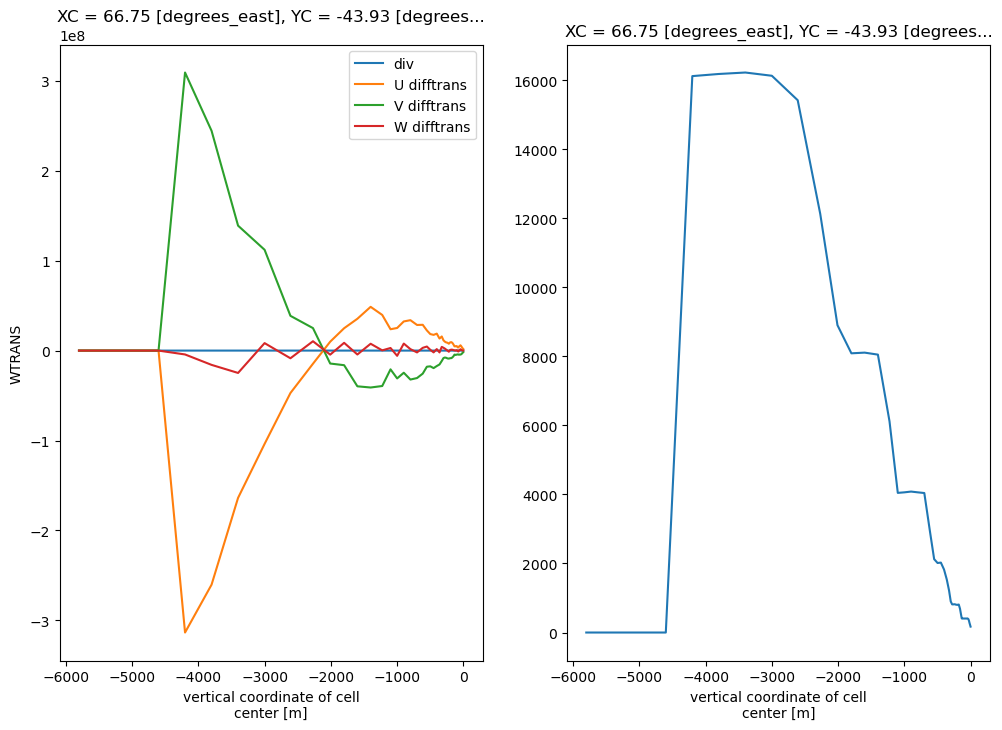

In [21]:
ix=400
iy=480
fig,axs=plt.subplots(1,2,figsize=(12,8))
DIV.isel(XC=ix,YC=iy).plot(ax=axs[0],label='div')
DIFFUTRANS.isel(XC=ix,YC=iy).plot(ax=axs[0],label='U difftrans')
DIFFVTRANS.isel(XC=ix,YC=iy).plot(ax=axs[0],label='V difftrans')
DIFFWTRANS.isel(XC=ix,YC=iy).plot(ax=axs[0],label='W difftrans') 
DIV.isel(XC=ix,YC=iy).plot(ax=axs[1])
axs[0].legend();

In [24]:

fig,axs=plt.subplots(2,2,figsize=(20,10))

land.plot(ax=axs[0,0], cmap="Greys", vmin=0.5, vmax=1.5, add_colorbar=False)
DIFFUTRANS2D.isel(YC=slice(0,587)).where(mask2D == 0).plot(ax=axs[0,0])

land.plot(ax=axs[0,1], cmap="Greys", vmin=0.5, vmax=1.5, add_colorbar=False)
DIFFVTRANS2D.isel(YC=slice(0,587)).where(mask2D == 0).plot(ax=axs[0,1])

land.plot(ax=axs[1,0], cmap="Greys", vmin=0.5, vmax=1.5, add_colorbar=False)
DIFFWTRANS2D.isel(YC=slice(0,587)).where(mask2D == 0).plot(ax=axs[1,0])

land.plot(ax=axs[1,1], cmap="Greys", vmin=0.5, vmax=1.5, add_colorbar=False)
DIV2D.isel(YC=slice(0,587)).where(mask2D == 0).plot(ax=axs[1,1])
axs[1,1].plot(67.42,-67.61,'o',markeredgewidth=2,markeredgecolor='black',markerfacecolor='None' )
axs[1,1].plot(66.75,-43.93,'o',markeredgewidth=2,markeredgecolor='black',markerfacecolor='None' );

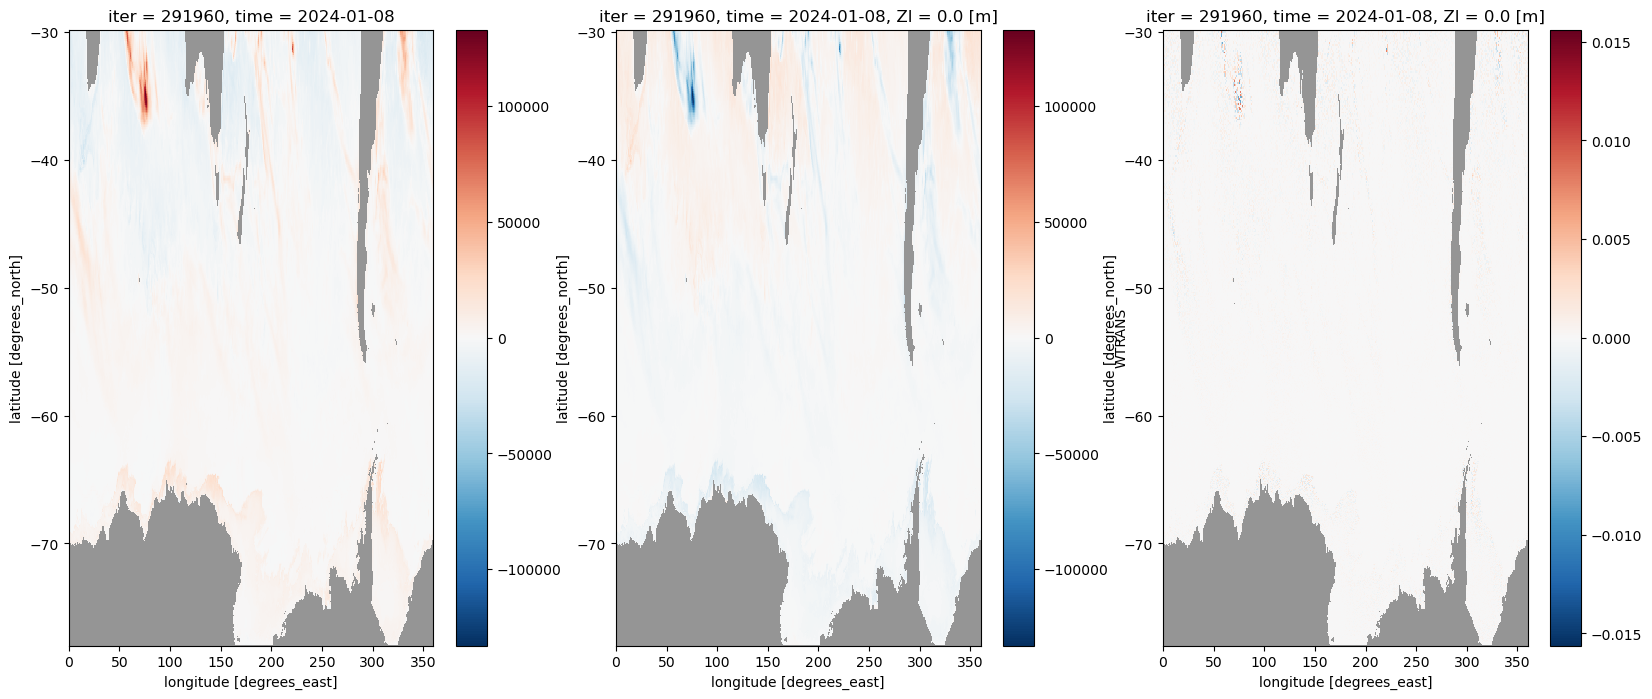

In [23]:
fig,axs=plt.subplots(1,3,figsize=(20,8))

land.plot(ax=axs[0], cmap="Greys", vmin=0.5, vmax=1.5, add_colorbar=False)
(ds.oceFWflx*ds.rA).where(mask2D == 0).plot(ax=axs[0])
land.plot(ax=axs[1], cmap="Greys", vmin=0.5, vmax=1.5, add_colorbar=False)
(ds['WTRANS'].isel(Zl=0)).where(mask2D == 0).plot(ax=axs[1])
land.plot(ax=axs[2], cmap="Greys", vmin=0.5, vmax=1.5, add_colorbar=False)
(ds.oceFWflx*ds.rA + ds['WTRANS'].isel(Zl=0)).where(mask2D == 0).plot(ax=axs[2]);

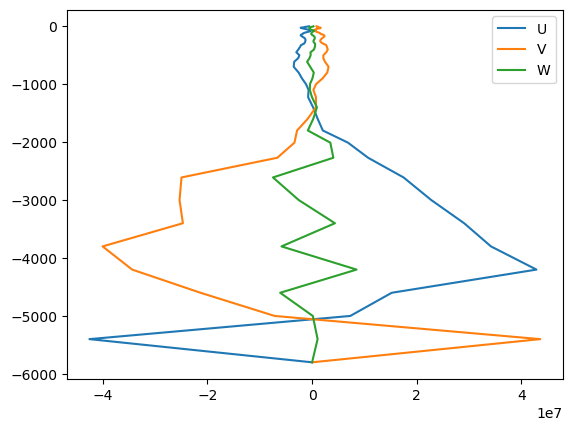

In [20]:
iy = 580
ix = 1200
it = 0
fig, ax = plt.subplots()
ax.plot(DIFFUTRANS.isel(XC=ix, YC=iy),ds.Z,label = 'U')
ax.plot(DIFFVTRANS.isel(XC=ix, YC=iy),ds.Z,label = 'V')
ax.plot(DIFFWTRANS.isel(XC=ix, YC=iy),ds.Z,label = 'W')

ax.legend()
plt.show()

### Heat budget ###

In [25]:
ADV_TH = - (grid.diff(ds['ADVx_TH'],'X') 
            + grid.diff(ds['ADVy_TH'],'Y',boundary = 'extend') 
            - grid.diff(ds['ADVr_TH'],'Z',boundary = 'fill', fill_value = 0) ) * rho_0 * Cp
ADV_TH = ADV_TH.rename('ADV_TH')

In [26]:
DIFF_TH = - (  grid.diff(ds['DFxE_TH'],'X')  
          + grid.diff(ds['DFyE_TH'],'Y',boundary = 'extend')  
          - grid.diff(ds['DFrI_TH'],'Z',boundary = 'fill', fill_value = 0) ) * rho_0 * Cp
DIFF_TH = DIFF_TH.rename('DIFF_TH')

In [27]:
Zlp1 = np.concatenate([ds.Zl.values,[-6000.]])
q1 = 0.62 * np.exp(Zlp1[:-1]/0.6) + (1-0.62) * np.exp(Zlp1[:-1]/20.0) 
q2 = 0.62 * np.exp(Zlp1[1:]/0.6) + (1-0.62) * np.exp(Zlp1[1:]/20.0)

# Correction for the 200m cutoff
zCut = np.where(ds.Z < -200)[0][0]
q1[zCut:] = 0
q2[zCut-1:] = 0
# Create xarray data arrays
q1 = xr.DataArray(q1,coords=[ds.Z],dims=['Z'])
q2 = xr.DataArray(q2,coords=[ds.Z],dims=['Z'])
landmask = ds.hFacC.copy(deep=True).compute()
landmask.values[landmask.values > 0] = 1
SF = (ds['TFLUX'] - (1-q1[0]+q2[0])*ds['oceQsw']) * landmask.isel(Z=0) * ds.rA
## Calculate subsurface shortwave radiation penetration 
SBSFQSW = ((q1 * (landmask == 1)-q2*(landmask.shift(Z=-1)==1))*ds['oceQsw']).rename('QSW')
SBSFQSW.values[SBSFQSW.Z == -2.1] = 0 
SBSFQSW = SBSFQSW * ds.rA

In [29]:
maskZ = xr.DataArray(np.zeros(len(ds['Z'])),dims=['Z'],coords={'Z':ds['Z']})
maskZ[0] = 1 

In [30]:
HEAT_TEND = ds["TOTTTEND"] * ds.rA * ds.drC * rho_0 * Cp * day_per_second
HEAT_TEND = HEAT_TEND.rename('HEAT_TEND')

In [31]:
SF3D=SF*maskZ

In [32]:
DIV_TH = DIV*ds.THETA*Cp

In [33]:
RES =  HEAT_TEND - ADV_TH - DIFF_TH - SF * maskZ - SBSFQSW  - DIV_TH
RESBIS =  HEAT_TEND - ADV_TH - DIFF_TH - SF * maskZ - SBSFQSW

In [34]:
RES2D = RES.sum('Z')
RESBIS2D = RESBIS.sum('Z')
HEAT_TEND2D = HEAT_TEND.sum('Z')
ADV_TH2D = ADV_TH.sum('Z')
SBSFQSW2D = SBSFQSW.sum('Z')
DIFF_TH2D = DIFF_TH.sum('Z')
DIV_TH2D = DIV_TH.sum('Z')

In [35]:
SBSFQSW2D = SBSFQSW2D.rename("Short wave")
SF = SF.rename("non-SW heat flux")
DIV_TH2D = DIV_TH2D.rename("divergence term")
RES2D = RES2D.rename("Residual")
RESBIS2D = RESBIS2D.rename("Residual without div term")

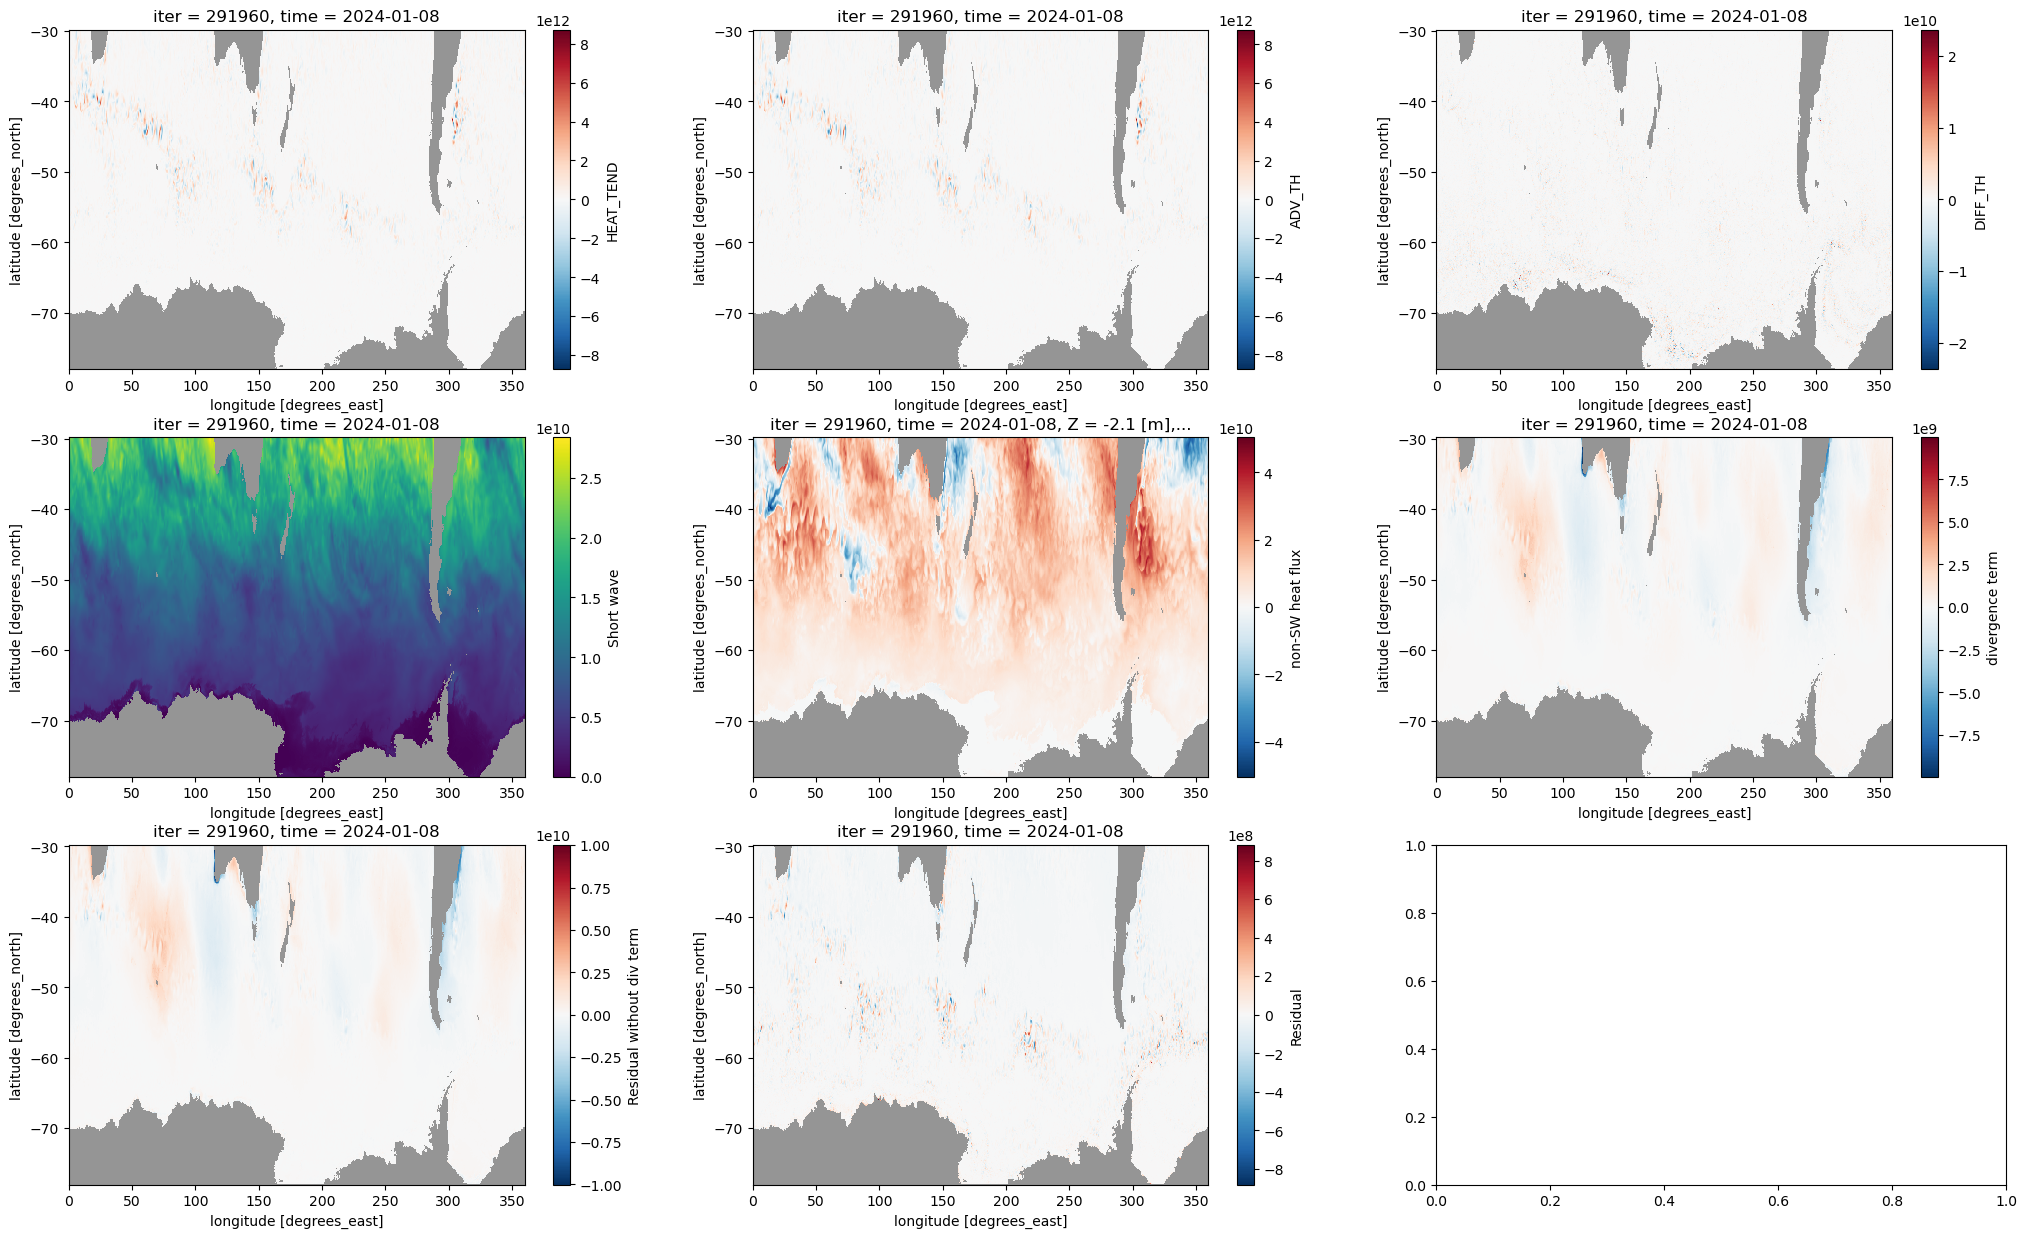

In [36]:
fig,axs=plt.subplots(3,3,figsize=(25,15))

land.plot(ax=axs[0,0], cmap="Greys", vmin=0.5, vmax=1.5, add_colorbar=False)
HEAT_TEND2D.isel(YC=slice(0,587)).where(mask2D == 0).plot(ax=axs[0,0])
land.plot(ax=axs[0,1], cmap="Greys", vmin=0.5, vmax=1.5, add_colorbar=False)
ADV_TH2D.isel(YC=slice(0,587)).where(mask2D == 0).plot(ax=axs[0,1])
land.plot(ax=axs[0,2], cmap="Greys", vmin=0.5, vmax=1.5, add_colorbar=False)
DIFF_TH2D.isel(YC=slice(0,587)).where(mask2D == 0).plot(ax=axs[0,2])
land.plot(ax=axs[1,0], cmap="Greys", vmin=0.5, vmax=1.5, add_colorbar=False)
SBSFQSW2D.isel(YC=slice(0,587)).where(mask2D == 0).plot(ax=axs[1,0])
land.plot(ax=axs[1,1], cmap="Greys", vmin=0.5, vmax=1.5, add_colorbar=False)
SF.isel(YC=slice(0,587)).where(mask2D == 0).plot(ax=axs[1,1])
land.plot(ax=axs[1,2], cmap="Greys", vmin=0.5, vmax=1.5, add_colorbar=False)
DIV_TH2D.isel(YC=slice(0,587)).where(mask2D == 0).plot(ax=axs[1,2])
land.plot(ax=axs[2,0], cmap="Greys", vmin=0.5, vmax=1.5, add_colorbar=False)
RESBIS2D.isel(YC=slice(0,587)).where(mask2D == 0).plot(ax=axs[2,0])
land.plot(ax=axs[2,1], cmap="Greys", vmin=0.5, vmax=1.5, add_colorbar=False)
RES2D.isel(YC=slice(0,587)).where(mask2D == 0).plot(ax=axs[2,1])

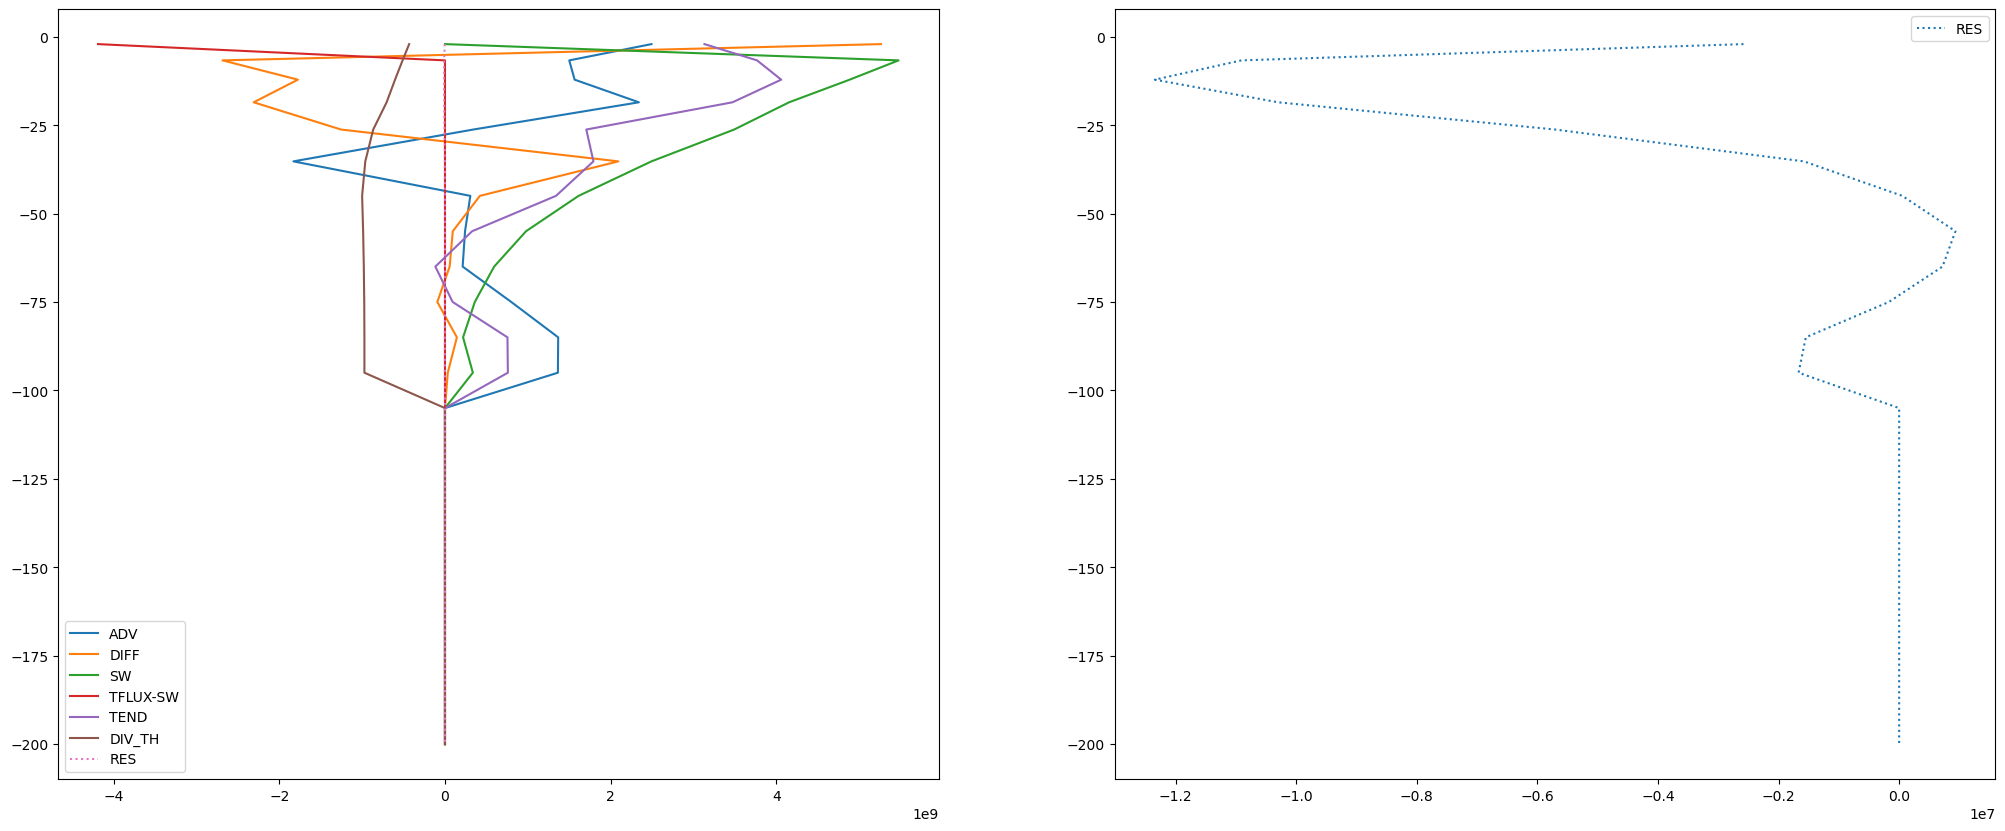

In [34]:
iy = 562
ix = 693
it = 0
fig, axs = plt.subplots(1,2,figsize=(25,10))
axs[0].plot(ADV_TH.isel(XC=ix, YC=iy)[:20],ds.Z[:20],label = 'ADV')
axs[0].plot(DIFF_TH.isel(XC=ix, YC=iy)[:20],ds.Z[:20],label = 'DIFF')
axs[0].plot(SBSFQSW.isel(XC=ix, YC=iy)[:20],ds.Z[:20],label = 'SW')
axs[0].plot(SF3D.isel(XC=ix, YC=iy)[:20],ds.Z[:20],label = 'TFLUX-SW')
axs[0].plot(HEAT_TEND.isel(XC=ix, YC=iy)[:20],ds.Z[:20],label = 'TEND')
axs[0].plot(DIV_TH.isel(XC=ix, YC=iy)[:20],ds.Z[:20],label = 'DIV_TH')
axs[0].plot(RES.isel(XC=ix, YC=iy,Z=slice(20)),ds.Z[:20],label = 'RES',linestyle = ':')
axs[1].plot(RES.isel(XC=ix, YC=iy,Z=slice(20)),ds.Z[:20],label = 'RES',linestyle = ':')
axs[0].legend()
axs[1].legend()
plt.show()

### Salt budget ###

In [37]:
ADV_SLT = - (grid.diff(ds['ADVx_SLT'],'X') 
            + grid.diff(ds['ADVy_SLT'],'Y',boundary = 'extend') 
            - grid.diff(ds['ADVr_SLT'],'Z',boundary = 'fill', fill_value = 0) ) * rho_0 * g_to_kg
ADV_SLT = ADV_SLT.rename('ADV_SLT')

In [38]:
DIFF_SLT = - (  grid.diff(ds['DFxE_SLT'],'X')  
          + grid.diff(ds['DFyE_SLT'],'Y',boundary = 'extend')  
          - grid.diff(ds['DFrI_SLT'],'Z',boundary = 'fill', fill_value = 0) ) * rho_0 * g_to_kg
DIFF_SLT = DIFF_SLT.rename('DIFF_SLT')

In [39]:
SALT_TEND = ds["TOTSTEND"] * ds.rA * ds.drC * rho_0 * g_to_kg * day_per_second
SALT_TEND = SALT_TEND.rename('SALT_TEND')

In [40]:
SALTFLX = ds["SFLUX"] * ds.rA * g_to_kg * maskZ

In [41]:
DIV_SALT = DIV * ds.SALT * g_to_kg

In [42]:
RES =  SALT_TEND - ADV_SLT - DIFF_SLT - SALTFLX - DIV_SALT

In [43]:
RES2D = RES.sum('Z')
SALT_TEND2D = SALT_TEND.sum('Z')
ADV_SLT2D = ADV_SLT.sum('Z')
SALTFLX2D = SALTFLX.sum('Z')
DIFF_SLT2D = DIFF_SLT.sum('Z')
DIV_SALT2D = DIV_SALT.sum('Z')


In [44]:
SALTFLX2D = SALTFLX2D.rename("Salt surf flux")
DIV_SALT2D = DIV_SALT2D.rename("rho_0.div(U).S")
RES2D = RES2D.rename("Residual")

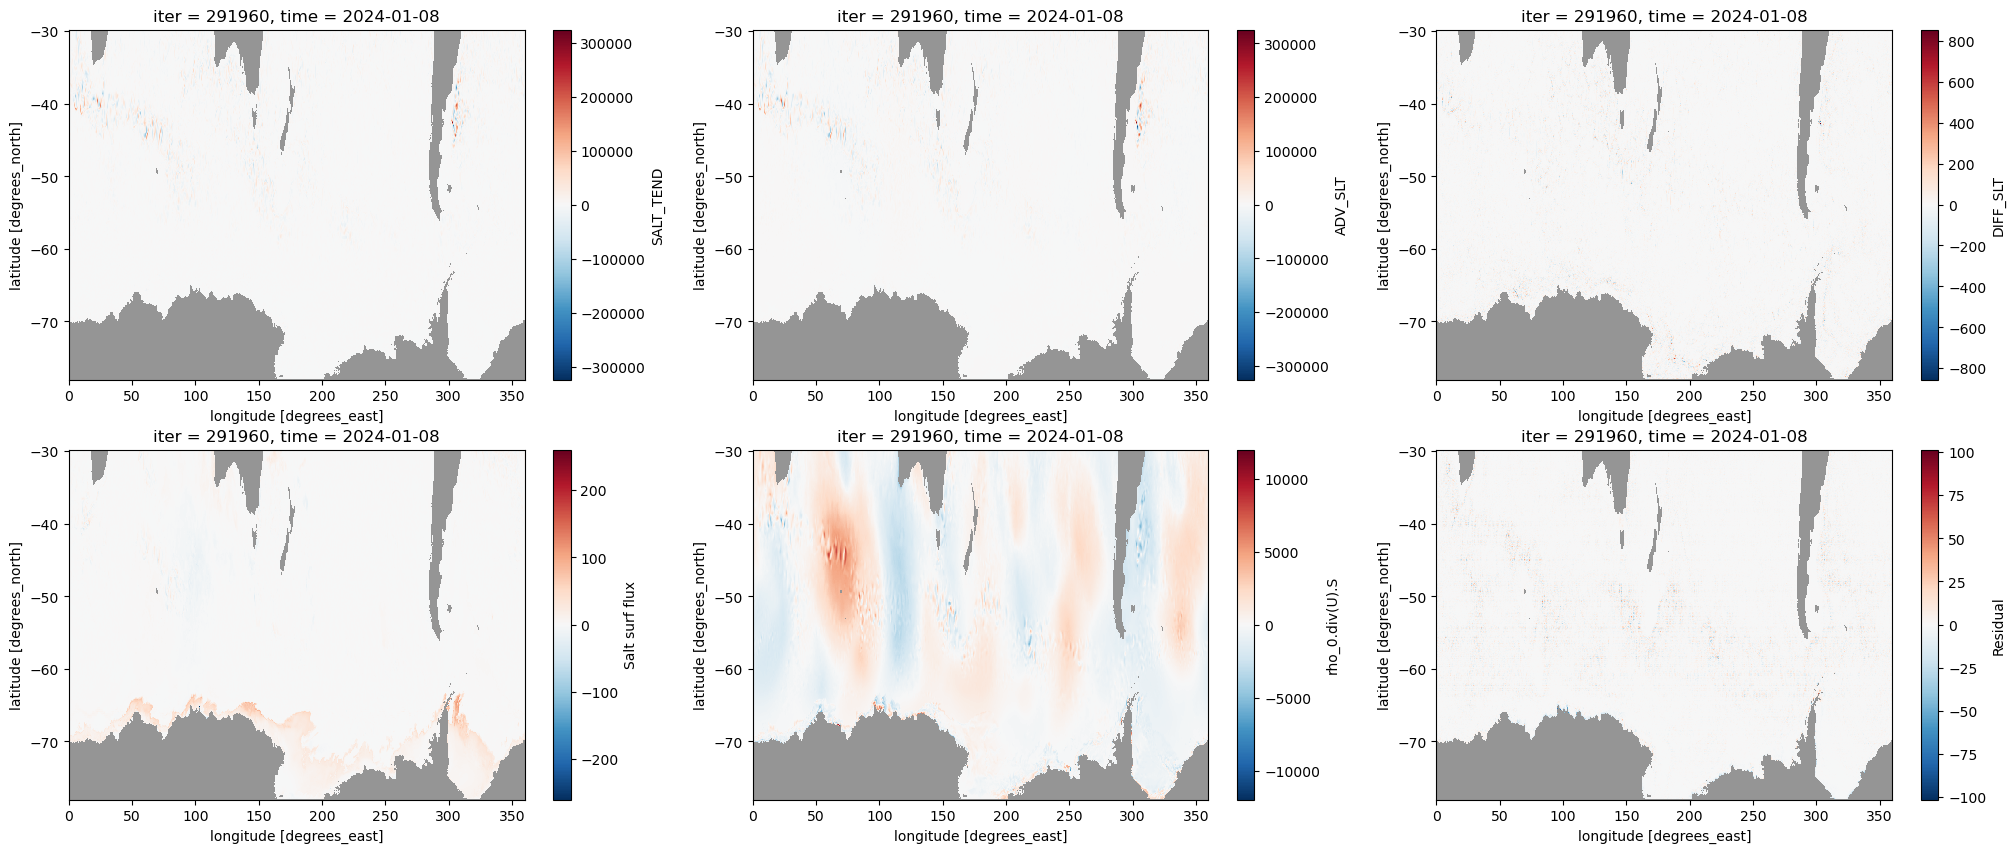

In [45]:
fig,axs=plt.subplots(2,3,figsize=(25,10))
land.plot(ax=axs[0,0], cmap="Greys", vmin=0.5, vmax=1.5, add_colorbar=False)
SALT_TEND2D.isel(YC=slice(0,587)).where(mask2D == 0).plot(ax=axs[0,0])
land.plot(ax=axs[0,1], cmap="Greys", vmin=0.5, vmax=1.5, add_colorbar=False)
ADV_SLT2D.isel(YC=slice(0,587)).where(mask2D == 0).plot(ax=axs[0,1])
land.plot(ax=axs[0,2], cmap="Greys", vmin=0.5, vmax=1.5, add_colorbar=False)
DIFF_SLT2D.isel(YC=slice(0,587)).where(mask2D == 0).plot(ax=axs[0,2])
land.plot(ax=axs[1,0], cmap="Greys", vmin=0.5, vmax=1.5, add_colorbar=False)
SALTFLX2D.isel(YC=slice(0,587)).where(mask2D == 0).plot(ax=axs[1,0])
land.plot(ax=axs[1,1], cmap="Greys", vmin=0.5, vmax=1.5, add_colorbar=False)
DIV_SALT2D.isel(YC=slice(0,587)).where(mask2D == 0).plot(ax=axs[1,1])
land.plot(ax=axs[1,2], cmap="Greys", vmin=0.5, vmax=1.5, add_colorbar=False)
RES2D.isel(YC=slice(0,587)).where(mask2D == 0).plot(ax=axs[1,2])


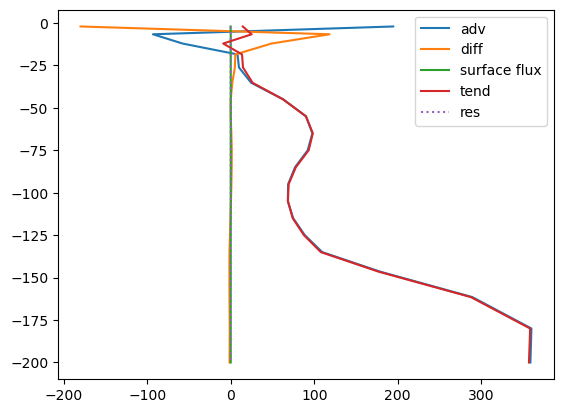

In [46]:
iy = 580
ix = 1200
it = 0
fig, ax = plt.subplots()
ax.plot(ADV_SLT.isel(XC=ix, YC=iy)[:20],ds.Z[:20],label = 'adv')
ax.plot(DIFF_SLT.isel(XC=ix, YC=iy)[:20],ds.Z[:20],label = 'diff')
ax.plot(SALTFLX.isel(XC=ix, YC=iy)[:20],ds.Z[:20],label = 'surface flux')
ax.plot(SALT_TEND.isel(XC=ix, YC=iy)[:20],ds.Z[:20],label = 'tend')
ax.plot(RES.isel(XC=ix, YC=iy,Z=slice(20)),ds.Z[:20],label = 'res',linestyle = ':')
ax.legend()
plt.show()

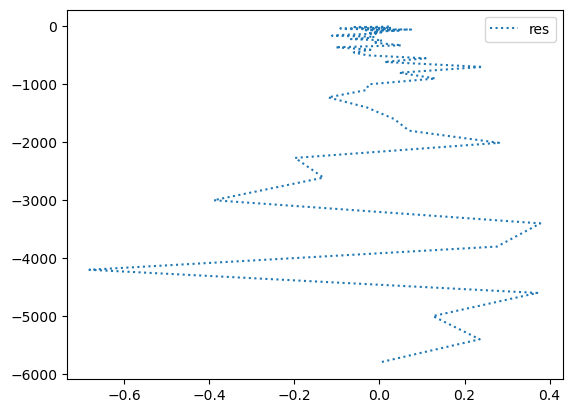

In [47]:
iy = 580
ix = 1200
fig, ax = plt.subplots()
ax.plot(RES [:,iy,ix],ds.Z,label = 'res',linestyle = ':')
ax.legend()
plt.close()
fig